In [42]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import glob as glob

In [2]:
def loadCombinedArray(cases,field):
    data = np.concatenate([np.load('../data/'+dataset+'/'+dataset+'_'+case+'_'+field + '.npy') for case in cases])
    return data


In [3]:
dataset = "kepsilon"
cases   = ["PHLL_case_1p0"]

x  = loadCombinedArray(cases,"Cx")
y  = loadCombinedArray(cases,"Cy")
z  = loadCombinedArray(cases,"Cz")
Ux = loadCombinedArray(cases,"Ux")
Uy = loadCombinedArray(cases,"Uy")
Uz = loadCombinedArray(cases,"Uz")
p  = loadCombinedArray(cases,"p")


data_combined = np.column_stack((Ux,Uy,Uz,p))
df = pd.DataFrame(data=data_combined)
df.columns=["Ux","Uy","Uz","p"]
# print(df.describe())
# df.hist(bins=30)

In [51]:
dataset = "kepsilon"
cases   = ["PHLL_case_1p0"]
field = "Cx"
glob.glob("../data/kepsilon/kepsilon_PHLL_case_1p0*")


['../data/kepsilon/kepsilon_PHLL_case_1p0_gradky.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_Ux.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_Uy.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_gradkx.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_Ak.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_gradkz.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_Uz.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_nu.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_wallDistance.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_T_t.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_gradU.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_I2.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_Akhat.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_Shat.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_epsilon.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_I1.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_k.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_p.npy',
 '../data/kepsilon/kepsilon_PHLL_case_1p0_q.npy'

In [39]:
data_combined

array([[ 3.03895e-03,  1.93239e-07,  0.00000e+00, -1.20449e-04],
       [ 3.03177e-03, -4.23846e-08,  0.00000e+00, -1.17666e-04],
       [ 3.03130e-03,  2.04504e-07, -2.62079e-26, -1.13894e-04],
       ...,
       [ 2.06558e-03, -3.59424e-04,  3.65020e-19, -3.49931e-04],
       [ 2.46435e-03, -1.03516e-04, -4.54630e-20, -3.44134e-04],
       [ 2.29137e-03, -1.80150e-06,  0.00000e+00, -3.25106e-04]])

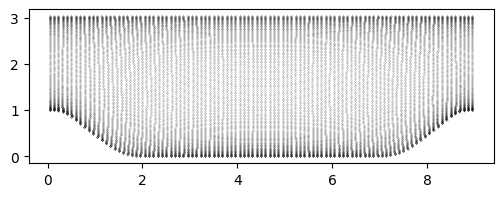

In [10]:

# fig, ax = plt.subplots(figsize=(6,2))

# ax.scatter(x,y,c="k",s=0.01)

In [6]:
# fig, ax = plt.subplots(4,figsize=(6,8),sharex=True)

# ax[0].tricontourf(x,y,Ux,levels=50,cmap="jet")
# ax[1].tricontourf(x,y,Uy,levels=50,cmap="jet")
# ax[2].tricontourf(x,y,Uz,levels=50,cmap="jet")
# ax[3].tricontourf(x,y,p, levels=50,cmap="jet")

In [8]:
df_features = df[["Ux","Uy"]]
df_target   = df["p"]

scaler_features = preprocessing.MinMaxScaler()
scaler_target   = preprocessing.MinMaxScaler()

df_features = pd.DataFrame(scaler_features.fit_transform(df_features),
                          columns=["Ux","Uy"])
df_target = pd.DataFrame(scaler_target.fit_transform(df_target.values.reshape(-1,1)),
                          columns=["p"])

In [9]:
# Building my NN
keras.backend.clear_session()

#Ux, Uy
input_layer = keras.layers.Input(shape=(2),name="input_layer")

#Hidden layers
hidden1     = keras.layers.Dense(20,name="Hidden1",kernel_initializer="lecun_normal",
                                activation="selu")(input_layer)
hidden2 = keras.layers.Dense(20,name='Hidden2', kernel_initializer="lecun_normal", activation = "selu")(hidden1)
hidden3 = keras.layers.Dense(20,name='Hidden3', kernel_initializer="lecun_normal", activation = "selu")(hidden2)
hidden4 = keras.layers.Dense(20,name='Hidden4', kernel_initializer="lecun_normal", activation = "selu")(hidden3)
hidden5 = keras.layers.Dense(20,name='Hidden5', kernel_initializer="lecun_normal", activation = "selu")(hidden4)


output_layer = keras.layers.Dense(1,name="output_layer")(hidden5)

model=keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()
# 
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(optimizer,loss="mse",metrics=["mae","mse"])
# 
history = model.fit([df_features],df_target,
                    epochs=200,
                    verbose= 0,
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 Hidden1 (Dense)             (None, 20)                60        
                                                                 
 Hidden2 (Dense)             (None, 20)                420       
                                                                 
 Hidden3 (Dense)             (None, 20)                420       
                                                                 
 Hidden4 (Dense)             (None, 20)                420       
                                                                 
 Hidden5 (Dense)             (None, 20)                420       
                                                                 
 output_layer (Dense)        (None, 1)                 21    

461/461 [==============================] - 1s 905us/step


Text(0.5, 1.0, 'Truth')

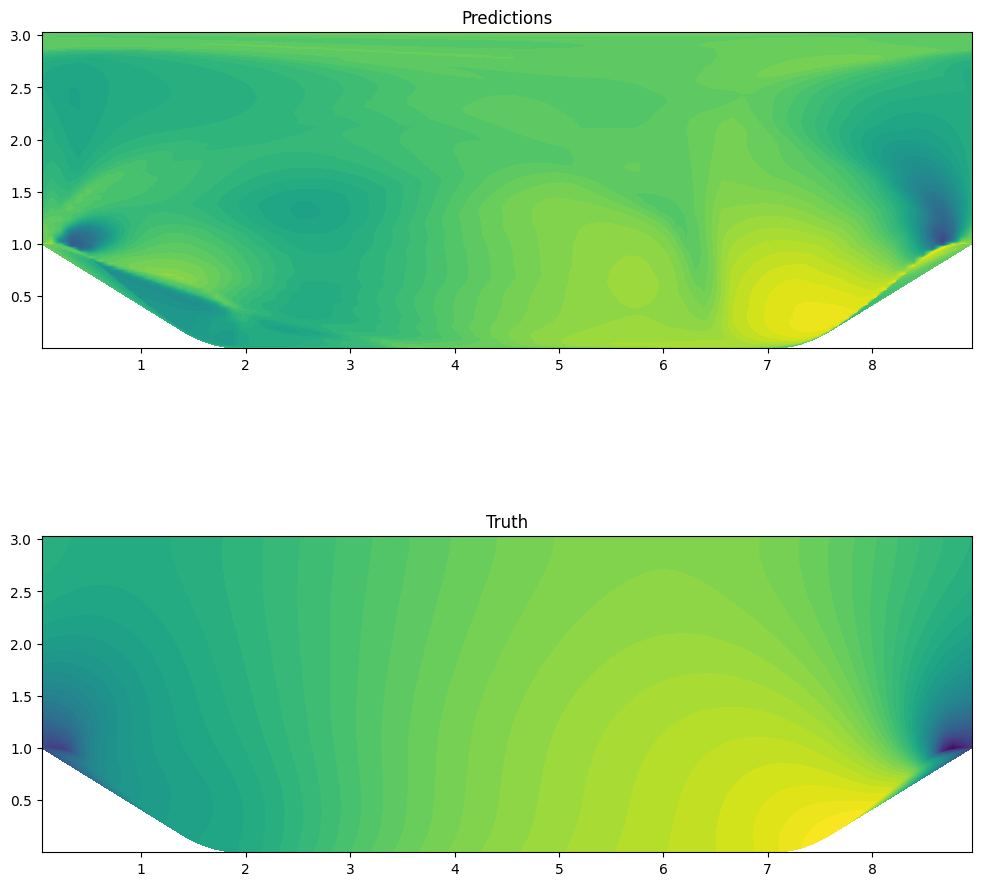

In [15]:
predictions = model.predict(df_features).reshape(len(df_features))
truth = df_target['p']

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.tricontourf(x,y,predictions,levels=50,vmin=0,vmax=1)
ax1.set_aspect(1)
ax1.set_title('Predictions')
ax2.tricontourf(x,y,truth,levels=50,vmin=0,vmax=1)
ax2.set_aspect(1)
ax2.set_title('Truth')

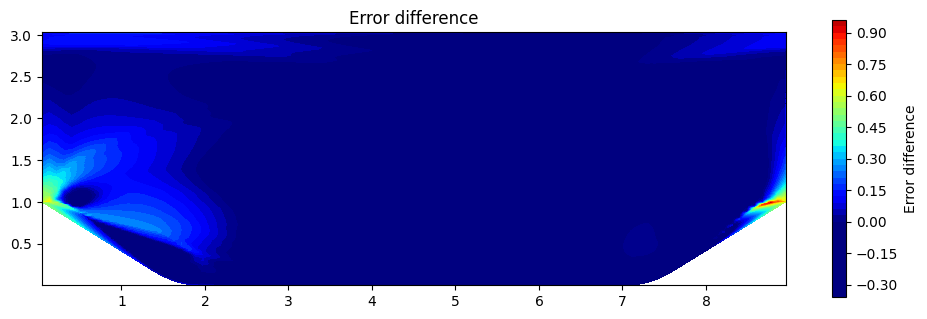

In [24]:
#Error
# calculate error for each point


fig, ax = plt.subplots(figsize=(12,12))

contour = ax.tricontourf(x,y,predictions-truth,levels=50,vmin=0,vmax=1,cmap="jet")
ax.set_aspect(1)

cbar = plt.colorbar(contour, ax=ax,shrink=0.3)
cbar.set_label('Error difference')

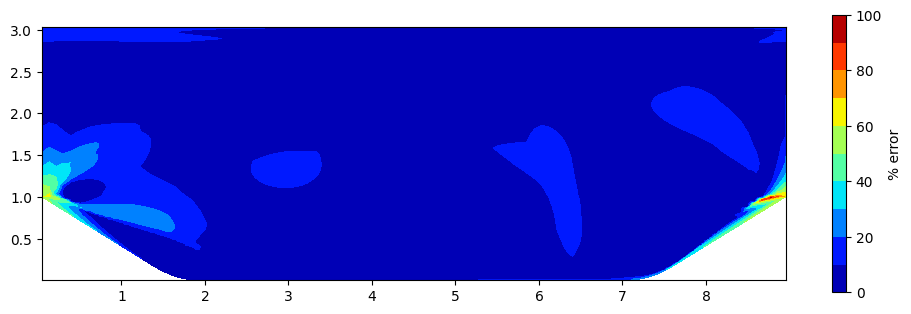

In [32]:
#Error
# calculate error for each point


fig, ax = plt.subplots(figsize=(12,12))

contour = ax.tricontourf(x,y,abs(predictions-truth)/truth.max()*100,
                         levels=10,
                         vmin=0,
                         vmax=100,
                         cmap="jet")
ax.set_aspect(1)

cbar = plt.colorbar(contour, ax=ax,shrink=0.3)
cbar.set_label('% error')

In [36]:
abs(predictions-truth).mean()*100

6.722479586652627

In [37]:
abs(predictions-truth).max()*100

95.11533631579375